In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df.shape

(174, 452)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is a pandas DataFrame
random_sample = df.sample(n=100)  # Randomly select 100 data points

In [ ]:
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [ ]:
#Label encoder-TO convert Categorical values to numerical values(ML prefers numbers and not categorical)
from sklearn.preprocessing import LabelEncoder
columns_to_encode=['ID', 'air_time1',	'disp_index1',	'gmrt_in_air1',	'gmrt_on_paper1',	'max_x_extension1',	'max_y_extension1',	'mean_acc_in_air1',	'mean_acc_on_paper1',	'mean_gmrt1',	'mean_jerk_in_air25',	'mean_jerk_on_paper25',	'mean_speed_in_air25',	'mean_speed_on_paper25' ,'num_of_pendown25',  'paper_time25',  'pressure_mean25',  'pressure_var25', 'total_time25', 'class']
label_encoder=LabelEncoder()

for column in columns_to_encode:
  df[column]=label_encoder.fit_transform(df[column])
df

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,0,128,112,12,12,5,69,114,151,11,...,89,150,125,110,24,92,93,158,119,1
1,86,161,126,9,8,86,86,85,39,9,...,6,43,2,0,70,156,44,153,145,1
2,97,69,96,71,82,140,33,119,123,68,...,118,13,64,43,27,114,33,53,82,1
3,108,60,96,133,96,92,121,142,89,124,...,54,85,73,16,66,143,36,139,132,1
4,119,64,21,88,26,8,13,80,40,58,...,62,112,38,18,44,72,122,74,71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,79,84,97,79,86,100,61,73,113,77,...,61,113,84,38,47,112,109,148,83,0
170,80,61,76,94,130,121,133,55,114,110,...,116,23,92,80,37,75,85,78,149,0
171,81,101,52,29,79,31,99,3,78,44,...,55,15,44,53,40,124,144,39,89,0
172,82,44,44,105,104,80,83,138,141,100,...,55,15,44,53,40,124,144,39,89,0


In [ ]:
#to separate x and y variables
X=df.drop('class',axis=1)
y=df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_logreg))
print('Accuracy :',accuracy_score(y_test,y_pred_logreg))
print('Precision:',precision_score(y_test,y_pred_logreg))
print('Recall:',recall_score(y_test,y_pred_logreg))
print('f1 score:',f1_score(y_test,y_pred_logreg))

[[10  7]
 [ 6 12]]
Accuracy : 0.6285714285714286
Precision: 0.631578947368421
Recall: 0.6666666666666666
f1 score: 0.6486486486486486


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn))
print('Recall:',recall_score(y_test,y_pred_knn))
print('f1 score:',f1_score(y_test,y_pred_knn))

[[17  0]
 [12  6]]
Accuracy : 0.6571428571428571
Precision: 1.0
Recall: 0.3333333333333333
f1 score: 0.5


In [ ]:
#criteria -Gini Index
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('Precision:',precision_score(y_test,y_pred_dt))
print('Recall:',recall_score(y_test,y_pred_dt))
print('f1 score:',f1_score(y_test,y_pred_dt))

[[16  1]
 [ 2 16]]
Accuracy : 0.9142857142857143
Precision: 0.9411764705882353
Recall: 0.8888888888888888
f1 score: 0.9142857142857143


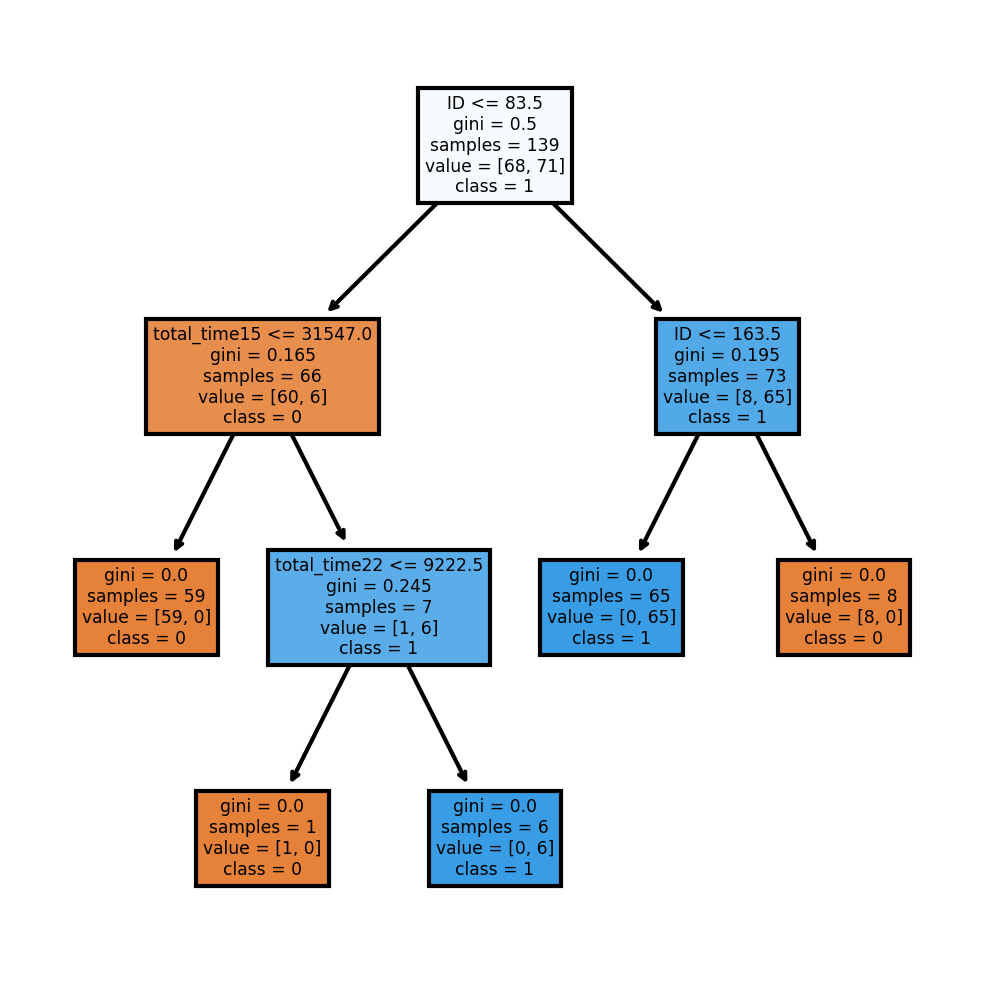

In [ ]:
#viualizing the tree
from sklearn.tree import plot_tree
fn=list(X_train)
cn=['0','1']
plt.figure(figsize=(4,4),dpi=300)
plot_tree(dtree,feature_names=fn,class_names=cn,filled=True);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtree.fit(X_train,y_train)
y_pred_dtt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dtt))
print('Accuracy:', accuracy_score(y_test,y_pred_dtt))
print('Precision:', precision_score(y_test,y_pred_dtt))
print('recall:', recall_score(y_test,y_pred_dtt))
print('f1 score:', f1_score(y_test,y_pred_dtt))

[[16  1]
 [ 2 16]]
Accuracy: 0.9142857142857143
Precision: 0.9411764705882353
recall: 0.8888888888888888
f1 score: 0.9142857142857143


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.01,random_state=1)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print('Accuracy:', accuracy_score(y_test,y_pred_svm))
print('Precision:', precision_score(y_test,y_pred_svm))
print('recall:', recall_score(y_test,y_pred_svm))
print('f1 score:', f1_score(y_test,y_pred_svm))

[[15  2]
 [ 3 15]]
Accuracy: 0.8571428571428571
Precision: 0.8823529411764706
recall: 0.8333333333333334
f1 score: 0.8571428571428571


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,random_state=1)
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[15  2]
 [ 3 15]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.88      0.83      0.86        18

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



Boosting

Gradient boosting

ADA boost

XG boost



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier(learning_rate=0.6,random_state=1)
gradient_booster.fit(X_train,y_train)
y_pred_gredboost = gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_gredboost))
print(accuracy_score(y_test,y_pred_gredboost))
print(classification_report(y_test,y_pred_gredboost))

[[16  1]
 [ 2 16]]
0.9142857142857143
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

[[16  1]
 [ 2 16]]
0.9142857142857143
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier(learning_rate=1,random_state=1)
model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[16  1]
 [ 2 16]]
0.9142857142857143
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model1=CatBoostClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred_cat=model1.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

Learning rate set to 0.004436
0:	learn: 0.6886020	total: 308ms	remaining: 5m 7s
1:	learn: 0.6841350	total: 441ms	remaining: 3m 39s
2:	learn: 0.6802575	total: 553ms	remaining: 3m 3s
3:	learn: 0.6758005	total: 700ms	remaining: 2m 54s
4:	learn: 0.6708187	total: 909ms	remaining: 3m
5:	learn: 0.6678614	total: 1.09s	remaining: 3m
6:	learn: 0.6631331	total: 1.23s	remaining: 2m 54s
7:	learn: 0.6584684	total: 1.35s	remaining: 2m 47s
8:	learn: 0.6550221	total: 1.51s	remaining: 2m 46s
9:	learn: 0.6504627	total: 1.64s	remaining: 2m 42s
10:	learn: 0.6470509	total: 1.76s	remaining: 2m 38s
11:	learn: 0.6428186	total: 1.89s	remaining: 2m 35s
12:	learn: 0.6385560	total: 2.01s	remaining: 2m 32s
13:	learn: 0.6342746	total: 2.11s	remaining: 2m 28s
14:	learn: 0.6306293	total: 2.2s	remaining: 2m 24s
15:	learn: 0.6277432	total: 2.31s	remaining: 2m 21s
16:	learn: 0.6242963	total: 2.41s	remaining: 2m 19s
17:	learn: 0.6211069	total: 2.51s	remaining: 2m 17s
18:	learn: 0.6160037	total: 2.6s	remaining: 2m 14s
19:	

Ensemble model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_svm,y_pred_dt]).T
meta_learner=RandomForestClassifier(random_state=1)
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[17  0]
 [ 0 18]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        18

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_svm,y_pred_dt]).T
meta_learner=RandomForestClassifier(random_state=1)
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[14  3]
 [ 0 18]]
0.9142857142857143
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.86      1.00      0.92        18

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35



In [ ]:
from sklearn.ensemble import RandomForestClassifier #ask
X=np.array([y_pred_rf,y_pred_gredboost,y_pred_abc,y_pred_xgb,y_pred_cat]).T
meta_learner=RandomForestClassifier(random_state=1)
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[17  0]
 [ 1 17]]
0.9714285714285714
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        18

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



Random Search CV

In [ ]:
### Manual Hyperparameter Tuning
model=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10,random_state=100)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[16  1]
 [ 2 16]]
0.9142857142857143
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [ ]:
model=CatBoostClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,predictions))
print('Accuracy:', accuracy_score(y_test,predictions))
print('Precision:', precision_score(y_test,predictions))
print('recall:', recall_score(y_test,predictions))
print('f1 score:', f1_score(y_test,predictions))

Learning rate set to 0.004436
0:	learn: 0.6877263	total: 75.4ms	remaining: 1m 15s
1:	learn: 0.6829296	total: 129ms	remaining: 1m 4s
2:	learn: 0.6797135	total: 185ms	remaining: 1m 1s
3:	learn: 0.6754544	total: 241ms	remaining: 1m
4:	learn: 0.6711189	total: 294ms	remaining: 58.5s
5:	learn: 0.6671003	total: 348ms	remaining: 57.7s
6:	learn: 0.6627940	total: 403ms	remaining: 57.2s
7:	learn: 0.6587087	total: 521ms	remaining: 1m 4s
8:	learn: 0.6550923	total: 665ms	remaining: 1m 13s
9:	learn: 0.6513775	total: 772ms	remaining: 1m 16s
10:	learn: 0.6480654	total: 882ms	remaining: 1m 19s
11:	learn: 0.6433238	total: 944ms	remaining: 1m 17s
12:	learn: 0.6383600	total: 998ms	remaining: 1m 15s
13:	learn: 0.6339703	total: 1.05s	remaining: 1m 13s
14:	learn: 0.6295249	total: 1.11s	remaining: 1m 12s
15:	learn: 0.6264295	total: 1.16s	remaining: 1m 11s
16:	learn: 0.6215976	total: 1.22s	remaining: 1m 10s
17:	learn: 0.6185429	total: 1.26s	remaining: 1m 9s
18:	learn: 0.6144994	total: 1.32s	remaining: 1m 8s
19:

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {#'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['gini']}
print(random_grid)

{'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini']}


In [ ]:
# Initialize the CatBoost classifier for Random Search
model = CatBoostClassifier(loss_function='Logloss', random_state=42)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)
cat=CatBoostClassifier()
cat_randomcv=RandomizedSearchCV(estimator=cat,param_distributions=param_dist,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
cat_randomcv.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=random_grid.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.6062052	total: 24.2ms	remaining: 2.4s
1:	learn: 0.5286588	total: 37.8ms	remaining: 1.85s
2:	learn: 0.4883030	total: 50.5ms	remaining: 1.63s
3:	learn: 0.4435733	total: 63.3ms	remaining: 1.52s
4:	learn: 0.3747957	total: 75.8ms	remaining: 1.44s
5:	learn: 0.3462902	total: 88.3ms	remaining: 1.38s
6:	learn: 0.3269195	total: 101ms	remaining: 1.34s
7:	learn: 0.2935580	total: 113ms	remaining: 1.3s
8:	learn: 0.2754410	total: 126ms	remaining: 1.27s
9:	learn: 0.2556391	total: 139ms	remaining: 1.25s
10:	learn: 0.2280051	total: 153ms	remaining: 1.24s
11:	learn: 0.2100015	total: 166ms	remaining: 1.22s
12:	learn: 0.1948178	total: 180ms	remaining: 1.2s
13:	learn: 0.1859108	total: 192ms	remaining: 1.18s
14:	learn: 0.1774079	total: 205ms	remaining: 1.16s
15:	learn: 0.1605734	total: 218ms	remaining: 1.14s
16:	learn: 0.1471541	total: 241ms	remaining: 1.18s
17:	learn: 0.1373090	total: 255ms	remaining: 1.16s
18:	learn: 0.1305380	total: 267ms	remaining: 1.14s
19:	learn: 0.1255671	total: 280ms	rema

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.5793094	total: 73.3ms	remaining: 7.26s
1:	learn: 0.4949226	total: 126ms	remaining: 6.2s
2:	learn: 0.4316919	total: 181ms	remaining: 5.87s
3:	learn: 0.3832065	total: 233ms	remaining: 5.59s
4:	learn: 0.3445491	total: 291ms	remaining: 5.53s
5:	learn: 0.3117011	total: 345ms	remaining: 5.4s
6:	learn: 0.2706661	total: 396ms	remaining: 5.27s
7:	learn: 0.2452825	total: 459ms	remaining: 5.28s
8:	learn: 0.2248905	total: 517ms	remaining: 5.23s
9:	learn: 0.2053987	total: 570ms	remaining: 5.13s
10:	learn: 0.1900659	total: 622ms	remaining: 5.03s
11:	learn: 0.1704823	total: 672ms	remaining: 4.93s
12:	learn: 0.1518028	total: 728ms	remaining: 4.87s
13:	learn: 0.1341702	total: 779ms	remaining: 4.78s
14:	learn: 0.1252655	total: 831ms	remaining: 4.71s
15:	learn: 0.1187069	total: 882ms	remaining: 4.63s
16:	learn: 0.1110866	total: 940ms	remaining: 4.59s
17:	learn: 0.1045877	total: 994ms	remaining: 4.53s
18:	learn: 0.0941371	total: 1.04s	remaining: 4.45s
19:	learn: 0.0893341	total: 1.09s	remainin

AttributeError: 'dict' object has no attribute 'predict'

In [ ]:
# Initialize the CatBoost classifier for Random Search
model = CatBoostClassifier(loss_function='Logloss', random_state=42)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)
cat=CatBoostClassifier()
cat_randomcv=RandomizedSearchCV(estimator=cat,param_distributions=param_dist,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
cat_randomcv.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
# Use the fitted cat_randomcv model to make predictions
y_pred = cat_randomcv.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.6062052	total: 19ms	remaining: 1.88s
1:	learn: 0.5286588	total: 32.5ms	remaining: 1.59s
2:	learn: 0.4883030	total: 45.3ms	remaining: 1.46s
3:	learn: 0.4435733	total: 58.1ms	remaining: 1.39s
4:	learn: 0.3747957	total: 71ms	remaining: 1.35s
5:	learn: 0.3462902	total: 83.8ms	remaining: 1.31s
6:	learn: 0.3269195	total: 96.9ms	remaining: 1.29s
7:	learn: 0.2935580	total: 110ms	remaining: 1.26s
8:	learn: 0.2754410	total: 138ms	remaining: 1.4s
9:	learn: 0.2556391	total: 153ms	remaining: 1.38s
10:	learn: 0.2280051	total: 167ms	remaining: 1.35s
11:	learn: 0.2100015	total: 180ms	remaining: 1.32s
12:	learn: 0.1948178	total: 192ms	remaining: 1.29s
13:	learn: 0.1859108	total: 205ms	remaining: 1.26s
14:	learn: 0.1774079	total: 219ms	remaining: 1.24s
15:	learn: 0.1605734	total: 235ms	remaining: 1.23s
16:	learn: 0.1471541	total: 248ms	remaining: 1.21s
17:	learn: 0.1373090	total: 261ms	remaining: 1.19s
18:	learn: 0.1305380	total: 274ms	remaining: 1.17s
19:	learn: 0.1255671	total: 287ms	remai

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.5793094	total: 88.4ms	remaining: 8.75s
1:	learn: 0.4949226	total: 139ms	remaining: 6.83s
2:	learn: 0.4316919	total: 203ms	remaining: 6.58s
3:	learn: 0.3832065	total: 301ms	remaining: 7.23s
4:	learn: 0.3445491	total: 394ms	remaining: 7.49s
5:	learn: 0.3117011	total: 490ms	remaining: 7.68s
6:	learn: 0.2706661	total: 586ms	remaining: 7.78s
7:	learn: 0.2452825	total: 689ms	remaining: 7.92s
8:	learn: 0.2248905	total: 795ms	remaining: 8.04s
9:	learn: 0.2053987	total: 900ms	remaining: 8.1s
10:	learn: 0.1900659	total: 994ms	remaining: 8.04s
11:	learn: 0.1704823	total: 1.1s	remaining: 8.1s
12:	learn: 0.1518028	total: 1.21s	remaining: 8.08s
13:	learn: 0.1341702	total: 1.31s	remaining: 8.04s
14:	learn: 0.1252655	total: 1.41s	remaining: 8s
15:	learn: 0.1187069	total: 1.51s	remaining: 7.94s
16:	learn: 0.1110866	total: 1.61s	remaining: 7.86s
17:	learn: 0.1045877	total: 1.71s	remaining: 7.8s
18:	learn: 0.0941371	total: 1.81s	remaining: 7.7s
19:	learn: 0.0893341	total: 1.91s	remaining: 7.6

In [ ]:
# Initialize the CatBoost classifier for Random Search
model = CatBoostClassifier(loss_function='Logloss', random_state=42)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}
cat=CatBoostClassifier()
cat_randomcv=RandomizedSearchCV(estimator=cat,param_distributions=param_dist,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
cat_randomcv.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
# Corrected code
y_pred = cat_randomcv.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))
best_random_grid=cat_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print("accuracy score{}".format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
0:	learn: 0.5793094	total: 181ms	remaining: 17.9s
1:	learn: 0.4949226	total: 295ms	remaining: 14.4s
2:	learn: 0.4316919	total: 407ms	remaining: 13.2s
3:	learn: 0.3832065	total: 511ms	remaining: 12.3s
4:	learn: 0.3445491	total: 633ms	remaining: 12s
5:	learn: 0.3117011	total: 730ms	remaining: 11.4s
6:	learn: 0.2706661	total: 804ms	remaining: 10.7s
7:	learn: 0.2452825	total: 925ms	remaining: 10.6s
8:	learn: 0.2248905	total: 1.04s	remaining: 10.5s
9:	learn: 0.2053987	total: 1.24s	remaining: 11.2s
10:	learn: 0.1900659	total: 1.4s	remaining: 11.4s
11:	learn: 0.1704823	total: 1.51s	remaining: 11.1s
12:	learn: 0.1518028	total: 1.56s	remaining: 10.4s
13:	learn: 0.1341702	total: 1.61s	remaining: 9.88s
14:	learn: 0.1252655	total: 1.66s	remaining: 9.43s
15:	learn: 0.1187069	total: 1.72s	remaining: 9.03s
16:	learn: 0.1110866	total: 1.77s	remaining: 8.66s
17:	learn: 0.1045877	total: 1.83s	remaining: 8.33s
18:	learn: 0.0941371	total: 1.9s	re

In [ ]:
# Import the CatBoostClassifier
from catboost import CatBoostClassifier

# Initialize the CatBoost classifier for Random Search
model = CatBoostClassifier(loss_function='Logloss', random_state=42)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Fit the randomized model
cat_randomcv.fit(X_train, y_train)

# Predict using the best estimator
y_pred = cat_randomcv.best_estimator_.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
cat=CatBoostClassifier()
cat_randomcv=RandomizedSearchCV(estimator=cat,param_distributions=param_dist,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
cat_randomcv.fit(X_train,y_train)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print("accuracy score{}".format(accuracy_score(y_test,y_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    #'max_depth': [rf_randomcv.best_params_['max_depth']],
    #'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    #'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     #rf_randomcv.best_params_['n_estimators'],
                     #rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

In [ ]:
# Fit the grid_search to the data
rf=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("accuracy score{}".format(accuracy_score(y_test,y_pred)))
print("classification report:{}".format(classification_report(y_test,y_pred)))

XAI

LIME(Local Interpretable model agnostic Explaination)-local,model-agnostic

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['class'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[1], meta_learner.predict,num_features=20)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
print(X.shape)

In [ ]:
exp = explainer.explain_instance(X.values[34], meta_learner.predict,num_features=5)

In [ ]:
X = X.iloc[:35]

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X_test.columns.values.tolist(),class_names=['class'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[25], meta_learner.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X_train.columns.values.tolist(),class_names=['class'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[15], meta_learner.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

LIME for SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.01)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test.values,feature_names=X_train.columns.values.tolist(),class_names=['sex'],mode='regression')
exp = explainer.explain_instance(X_test.values[30], clf.predict,num_features=5)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

SHAP

In [ ]:
pip install shapash

In [ ]:
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2=model2.fit(X_train, y_train)
rf_y_pred = model2.predict(X_test)
rf_y_pred

In [ ]:
fi=pd.DataFrame({'Feature': X_train.columns,'Importance':model.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl=SmartExplainer(model2)
xpl.compile(x=X_test)
xpl.plot.features_importance()

In [ ]:
import random
subset=random.choices(X_test.index,k=50)
xpl.plot.features_importance(selection=subset)

In [ ]:
xpl.plot.contribution_plot('mean_acc_on_paper9')

In [ ]:
xpl.plot.local_plot(index=random.choice(X_test.index))